rychlost D vuci A kolu byla co nejblize k 1/6.931

geneticke algorithms
potom provnat s SOMA

chyba = $ 1/ ( ((N_a * N_c)/(N_b * N_d)) - 1/6.961 )  $ 
50 30 16 42 
na nb nc nd

In [435]:
import numpy as np
import pygad
import matplotlib.pyplot as plt

Pocatecni podminky

In [436]:
CILOVY_POMER = 1. / 6.931
max_rozmer = 60
min_rozmer = 12

In [437]:
def fitness_fukce(ga_instance, reseni, reseni_idx):
    NA, NB, NC, ND = reseni
    prevodovy_pomer =  (NA * NC) / (NB * ND) 
    chyba = np.abs( prevodovy_pomer - CILOVY_POMER)
    fitness = 1./chyba
    return fitness

In [438]:
FITNESS_VYSLEDKY = []

def callback_generation(ga_instance):
    aktualni_fitness = ga_instance.last_generation_fitness
    FITNESS_VYSLEDKY.append(np.max(aktualni_fitness))

Konfigurace gen alg

po rws vytvori 50 potomku, pokud nechame rodice pak pomoci rws omezi populace zpet na 50

In [439]:
rozmer_populace = 50
pocet_genu = 4
pocatecni_populace = np.random.randint(min_rozmer, max_rozmer + 1, size=(rozmer_populace, pocet_genu))

pocet_generace = 100
pocet_rodicu_na_krizeni = 5

typ_selekce = "rws"
typ_kruzeni = "two_points"
typ_mutace = "random" # "swap" 
sance_mutace = 5


In [440]:
ga_instance = pygad.GA(num_generations = pocet_generace, 
                       num_parents_mating = pocet_rodicu_na_krizeni, 
                       initial_population=pocatecni_populace,
                       fitness_func = fitness_fukce,
                       mutation_percent_genes = sance_mutace,
                       init_range_low = min_rozmer,
                       init_range_high = max_rozmer,
                       parent_selection_type = typ_selekce,
                       crossover_type = typ_kruzeni,
                       mutation_type = typ_mutace,
                    #    gene_type = int,
                       on_generation = callback_generation)

c:\Users\Home\Desktop\vyučovaní\Programovani\1 Letni semestr 2 rocnik\PPM2\.venv\Lib\site-packages\pygad\pygad.py:748: UserWarning: The percentage of genes to mutate (mutation_percent_genes=5) resulted in selecting (0) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).
If you do not want to mutate any gene, please set mutation_type=None.
  warnings.warn(f"The percentage of genes to mutate (mutation_percent_genes={mutation_percent_genes}) resulted in selecting ({mutation_num_genes}) genes. The number of genes to mutate is set to 1 (mutation_num_genes=1).\nIf you do not want to mutate any gene, please set mutation_type=None.")
c:\Users\Home\Desktop\vyučovaní\Programovani\1 Letni semestr 2 rocnik\PPM2\.venv\Lib\site-packages\pygad\pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time

In [441]:
ga_instance.run()

In [442]:
reseni, fitness, reseni_idx = ga_instance.best_solution()
vysledek = {
    'fitness': fitness,
    'reseni': reseni}

In [443]:
print(vysledek['fitness'])
print(vysledek['reseni'])

1160163.0579392966
[14.97994295 37.16631968 21.12583172 59.01572158]


In [444]:
NA, NB, NC, ND = vysledek['reseni']
prevodovy_pomer =  (NA * NC) / (NB * ND) 
chyba = np.abs( prevodovy_pomer - CILOVY_POMER)
chyba

8.619478039373352e-07

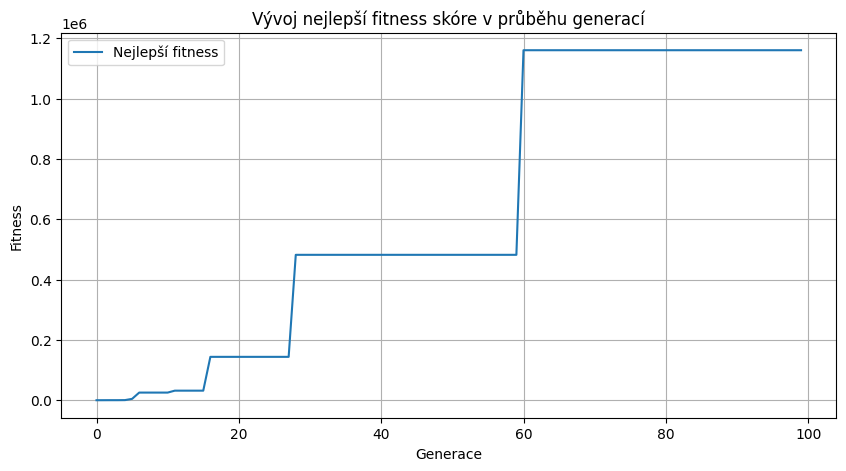

In [445]:
plt.figure(figsize=(10, 5))
plt.plot(FITNESS_VYSLEDKY, label='Nejlepší fitness')
plt.title('Vývoj nejlepší fitness skóre v průběhu generací')
plt.xlabel('Generace')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()

# SOMA

PathLength - jak daleko od leadra se zastavi. * vekror [1,2], 1- na pozice, 2 za, <1 - pred, 3 doporuceni. (delka cesty)

PRT - permutace(mutace), nejde primo

D - pocet argumentu v funkce = 4

In [446]:
from copy import deepcopy

In [447]:
CILOVY_POMER = 1. / 6.931
max_rozmer = 60
min_rozmer = 12

rozmer_populace = 50
pocet_genu = 4
pocet_generace = 100
sance_mutace = 5

max_delka_migrace = 3.0
krok = 0.11
sence_mutace = 0.1 # 10 %

populace = pocatecni_populace.copy()
VYSLEDKY_FITNESS = [-np.inf]

In [448]:
def fitness_fukce(reseni):
    NA, NB, NC, ND = reseni
    prevodovy_pomer =  (NA * NC) / (NB * ND) 
    chyba = np.abs( prevodovy_pomer - CILOVY_POMER)
    fitness = 1./(chyba + 1e-6)
    return fitness

In [449]:
def najit_leadera(populace):
    fitness = [fitness_fukce(jedinec) for jedinec in populace]
    VYSLEDKY_FITNESS.append(np.max(fitness))

    leader_idx = np.argmax(fitness)
    leader = populace[leader_idx]
    
    return leader, leader_idx

In [450]:
def migrace_jedince(jedinec, leader):
    cesta_migrace = []
    smer_migrace = leader - jedinec
    for posun in np.arange(0, max_delka_migrace + krok, krok):
        nova_pozice = jedinec + posun * smer_migrace * np.random.uniform(-sance_mutace, sance_mutace, size=pocet_genu)
        nova_pozice = np.clip(nova_pozice, min_rozmer, max_rozmer)
        cesta_migrace.append(nova_pozice)
    return cesta_migrace

In [451]:
def vytvorit_novou_populace(populace):
    leader, leader_idx = najit_leadera(populace)
    dalsi_populace = [leader]
    populace = np.delete(populace, leader_idx, axis = 0)

    for jedinec in populace:
        cesta_migrace = migrace_jedince(jedinec, leader)
        fitness_cesty_jedince = [fitness_fukce(pozice) for pozice in cesta_migrace]
        
        idx_njlepsi_pozice = np.argmax(fitness_cesty_jedince)
        nejlep_pozice_jedince = cesta_migrace[idx_njlepsi_pozice]

        dalsi_populace.append(nejlep_pozice_jedince)    
    
    return np.array(dalsi_populace)

In [452]:
for _ in range(pocet_generace):
    dalsi_populace = vytvorit_novou_populace(populace)
    populace = deepcopy(dalsi_populace)

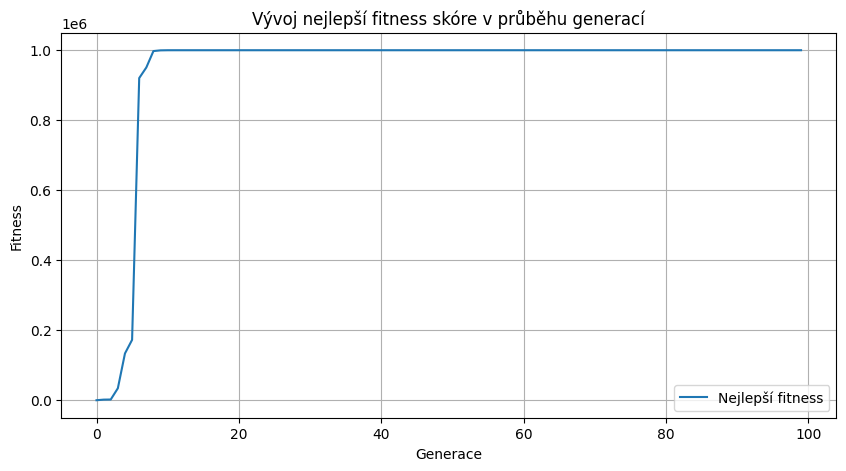

In [453]:
plt.figure(figsize=(10, 5))
plt.plot(VYSLEDKY_FITNESS[1:], label='Nejlepší fitness')
plt.title('Vývoj nejlepší fitness skóre v průběhu generací')
plt.xlabel('Generace')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.show()

In [454]:
leader, leader_idx = najit_leadera(populace)
NA, NB, NC, ND = leader
prevodovy_pomer =  (NA * NC) / (NB * ND) 
chyba = np.abs( prevodovy_pomer - CILOVY_POMER)
chyba

0.0

In [455]:
leader

array([43.28379743, 60.        , 12.        , 60.        ])